In [9]:
import pandas as pd
import seaborn as sns
import matplotlib
from utils.stock_data_utils import StockDataUtil

In [2]:
# stock_finの読み込み
fin = dfs["stock_fin"].copy()

# 銘柄コード9984と9983を比較する
codes = [9984, 9983]

multi_df = dict()

# プロット対象を定義
columns = [
    "Result_FinancialStatement NetSales",  # 売上高
    "Result_FinancialStatement OperatingIncome",  # 営業利益
    "Result_FinancialStatement NetIncome",  # 純利益
    "Result_FinancialStatement NetAssets",  # 純資産
    "Result_FinancialStatement ReportType"  # 決算期
]

# 比較対象の銘柄コード毎に処理
for code in codes:
    # 特定の銘柄コードに絞り込み
    fin_data = fin[fin["Local Code"] == code].copy()
    # 日付列をpd.Timestamp型に変換してindexに設定
    fin_data.loc[:, "datetime"] = pd.to_datetime(fin_data["base_date"])
    fin_data.set_index("datetime", inplace=True)
    # 2019年までの値を表示
    fin_data = fin_data[:"2019"]
    # 重複を排除
    fin_data.drop_duplicates(
        subset=[
            "Local Code",
            "Result_FinancialStatement FiscalYear",
            "Result_FinancialStatement ReportType"
        ],
        keep="last", inplace=True)
    # プロット対象のカラムを取得
    _fin_data = fin_data[columns]
    # 決算期毎の平均を取得
    multi_df[code] = _fin_data[columns].groupby("Result_FinancialStatement ReportType").mean()

# 銘柄毎に処理していたものを結合
multi_df = pd.concat(multi_df)
# 凡例を調整
multi_df.set_index(multi_df.index.map(lambda t: f"{t[0]}/{t[1]}"), inplace=True)
# プロット
ax = multi_df.T.plot(kind="bar", figsize=(12, 6), grid=True)
# Y軸のラベルを調整
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: "{} bYen".format(int(x / 1_000))))

NameError: name 'dfs' is not defined

In [4]:
fin = StockDataUtil.get_fin()
fin.head()

,base_date,Local Code,Result_FinancialStatement AccountingStandard,Result_FinancialStatement FiscalPeriodEnd,Result_FinancialStatement ReportType,Result_FinancialStatement FiscalYear,Result_FinancialStatement ModifyDate,Result_FinancialStatement CompanyType,Result_FinancialStatement ChangeOfFiscalYearEnd,Result_FinancialStatement NetSales,...,Result_Dividend DividendPayableDate,Result_Dividend QuarterlyDividendPerShare,Result_Dividend AnnualDividendPerShare,Forecast_Dividend FiscalPeriodEnd,Forecast_Dividend ReportType,Forecast_Dividend FiscalYear,Forecast_Dividend ModifyDate,Forecast_Dividend RecordDate,Forecast_Dividend QuarterlyDividendPerShare,Forecast_Dividend AnnualDividendPerShare
0,2016/01/04,2753,ConsolidatedJP,2015/12,Q3,2016.0,2016/01/04,GB,False,22354.0,...,NaN,NaN,NaN,2016/03,Annual,2016.0,2016/01/04,2016/03/31,45.0,90.0
1,2016/01/04,3353,ConsolidatedJP,2015/11,Q3,2016.0,2016/01/04,GB,False,21550.0,...,NaN,NaN,NaN,2016/02,Annual,2016.0,2016/01/04,2016/02/29,32.5,65.0
2,2016/01/04,4591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016/03,Annual,2016.0,2016/01/04,2016/03/31,0.0,0.0
3,2016/01/04,6786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2016/03,Annual,2016.0,2016/01/04,2016/03/31,0.0,0.0
4,2016/01/04,7463,ConsolidatedJP,2015/12,Q3,2016.0,2016/01/04,GB,False,14307.0,...,NaN,NaN,NaN,2016/03,Annual,2016.0,2016/01/04,2016/03/31,18.0,18.0


In [15]:
codes = [9984, 9983]
columns = [
    "Result_FinancialStatement NetSales",  # 売上高
    "Result_FinancialStatement OperatingIncome",  # 営業利益
    "Result_FinancialStatement NetIncome",  # 純利益
    "Result_FinancialStatement NetAssets",  # 純資産
    "Result_FinancialStatement ReportType"  # 決算期
]

def get_stat(df):
    df = df.copy()
    df['datetime'] = pd.to_datetime(df["base_date"])
    df.set_index('datetime',inplace=True)
    df = df[:'2019']
    
    df.drop_duplicates(
        subset=[
            "Local Code",
            "Result_FinancialStatement FiscalYear",
            "Result_FinancialStatement ReportType"
        ],
        keep="last", inplace=True)
    df = df[columns]
    stat = df.groupby('Result_FinancialStatement ReportType').mean()
    return stat
    
tables = []
for code in codes:
    df = fin[fin['Local Code']==code]
    stat = get_stat(df)
    stat.set_index(stat.index + f' ({code})',inplace=True)
    tables.append(stat)

df = pd.concat(tables)
df

,Result_FinancialStatement NetSales,Result_FinancialStatement OperatingIncome,Result_FinancialStatement NetIncome,Result_FinancialStatement NetAssets
Annual (9984),9203888.50,1420804.75,1087664.00,5814306.75
Q1 (9984),2230440.00,550579.50,423771.00,6048312.75
Q2 (9984),4497136.50,733486.75,532631.50,6140366.25
Q3 (9984),6842849.50,1208204.50,959935.75,5923121.00
Annual (9983),2017249.50,199388.50,121180.25,811503.75
Q1 (9983),577660.50,95769.50,67433.75,841999.50
Q2 (9983),1120905.75,143357.75,90613.75,830166.00
Q3 (9983),1609900.00,203258.00,124531.50,835542.25


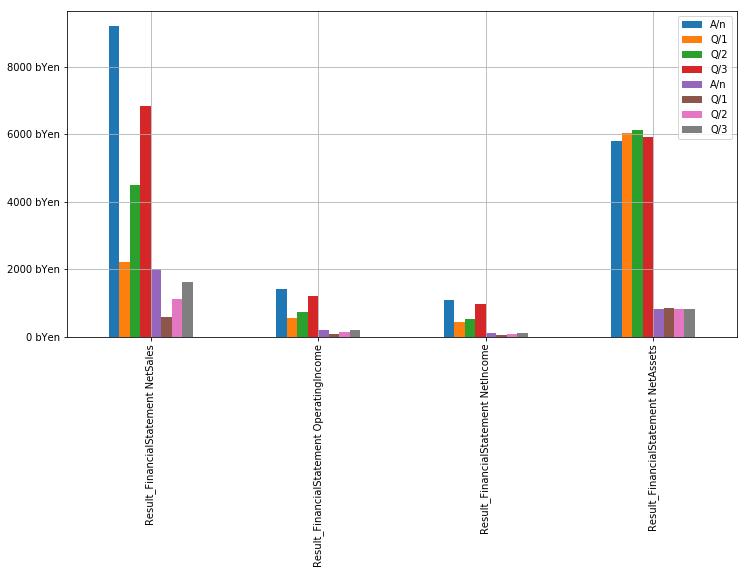

In [19]:

ax = df.T.plot(kind="bar", figsize=(12, 6), grid=True)
# Y軸のラベルを調整
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: "{} bYen".format(int(x / 1_000))))